# 2. EDA

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pickle

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify_prep.csv')

In [3]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity_class,release_year,release_month
0,6f807x0ima9a1j3VPbc7VN,I Dont Care with Justin Bieber Loud Luxury Remix,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Dont Care with Justin Bieber Loud Luxury Remix,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,60–80,2019,6
1,0r7CVbZTWZgbTCYdfa2P31,Memories Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories Dillon Francis Remix,2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,60–80,2019,12
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time Don Diablo Remix,2019-05-07,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,60–80,2019,5
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,40–60,2019,7
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved Future Humans Remix,2019-05-03,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,60–80,2019,5


# DATA PROTOCOL

* Reporting types Missing, min, max

In [4]:
with pd.ExcelWriter("summary.xlsx") as xw:
    df.dtypes.astype(str).rename("dtype").to_excel(xw, sheet_name="data_type")
    df.max(numeric_only=True).to_excel(xw, sheet_name="max_numeric")
    df.min(numeric_only=True).to_excel(xw, sheet_name="min_numeric")
    df.isnull().sum().rename("missing").to_excel(xw, sheet_name="missing")
    df.nunique().rename("unique").to_excel(xw, sheet_name="unique")

# Instant Reports

In [5]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
AV.AutoViz('/content/drive/MyDrive/Colab Notebooks/Spotify_prep.csv')

Output hidden; open in https://colab.research.google.com to view.

# Descriptive Statistics

In [6]:
df.shape

(32833, 26)

In [7]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year,release_month
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622,2012.431700,5.977979
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182,12.359393,3.775478
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000,1957.000000,1.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000,2009.000000,2.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000,2016.000000,6.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000,2019.000000,9.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000,2074.000000,12.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32823 non-null  object 
 2   track_artist              32825 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32819 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

# visualize the target `track_popularity`

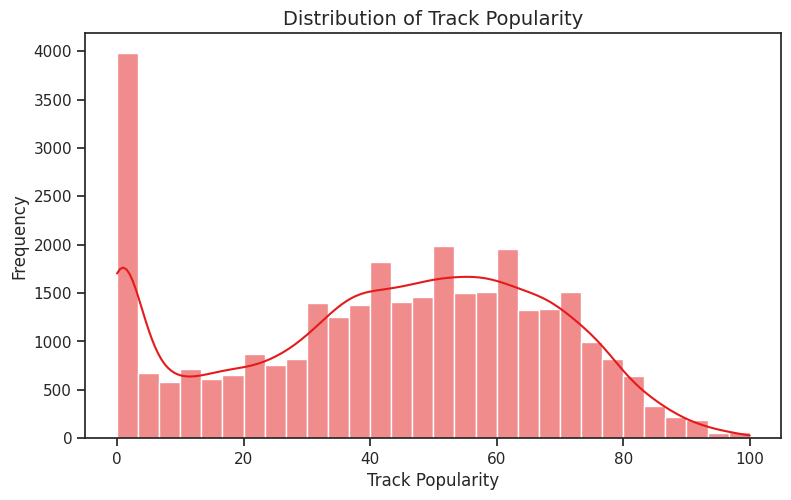

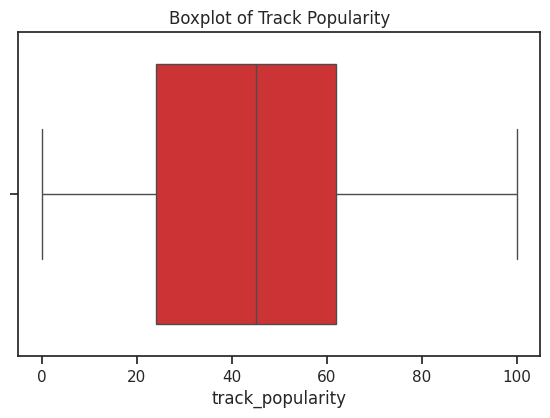

Skewness of track_popularity: -0.23


In [9]:
# ==============================================================
# 🎯 TARGET VARIABLE: track_popularity
# ==============================================================

plt.figure(figsize=(8, 5))
sns.histplot(df['track_popularity'], bins=30, kde=True)
plt.title("Distribution of Track Popularity", fontsize=14)
plt.xlabel("Track Popularity")
plt.ylabel("Frequency")
plt.show()

# Check for outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['track_popularity'])
plt.title("Boxplot of Track Popularity")
plt.show()

print(f"Skewness of track_popularity: {df['track_popularity'].skew():.2f}")

* Deal with categorial data

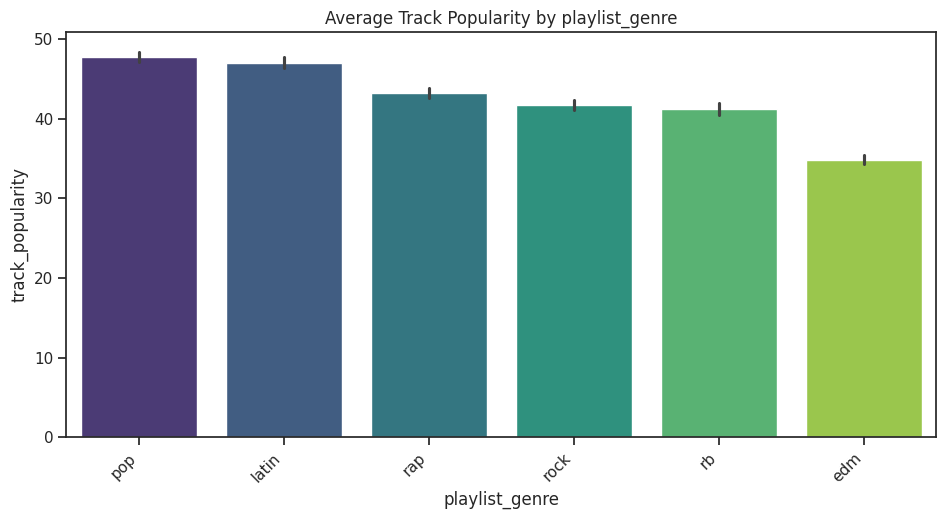

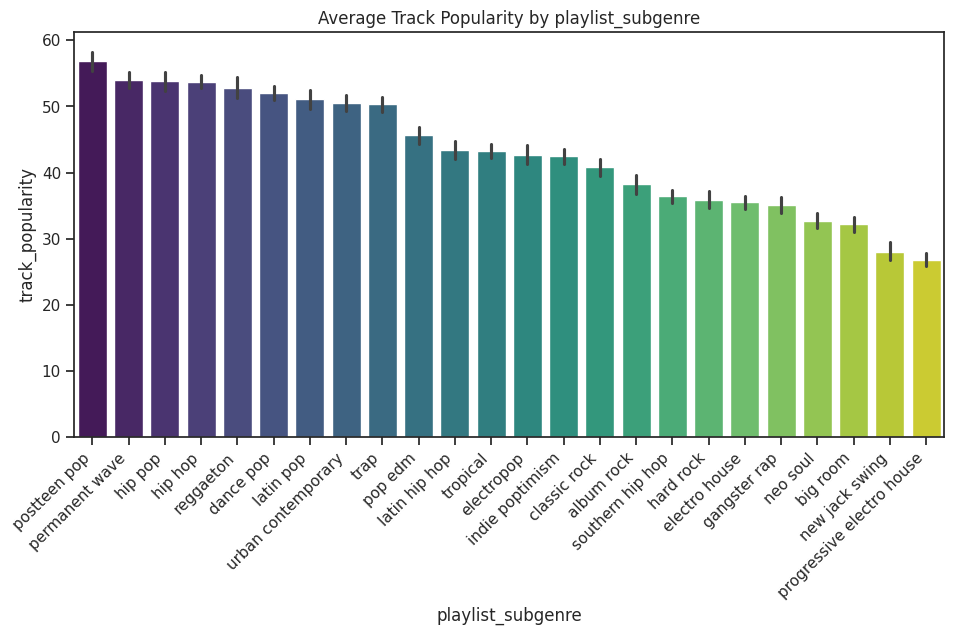

In [10]:
# ==============================================================
# 🎶 CATEGORICAL FEATURES ANALYSIS
# ==============================================================

cat_cols = ['playlist_genre', 'playlist_subgenre']

for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 5))
        order = df.groupby(col)['track_popularity'].mean().sort_values(ascending=False).index
        sns.barplot(x=df[col], y=df['track_popularity'], order=order, palette="viridis")
        plt.title(f"Average Track Popularity by {col}")
        plt.xticks(rotation=45, ha='right')
        plt.show()

In [11]:
df['release_month'] = df['release_month'].astype('category')
#df['release_year'] = df['release_year'].astype('category')

# Filter out the categorical columns
categorical_df = df.select_dtypes(include=['category'])

In [12]:
plot_categorical = lambda col: sns.countplot(x=col, data=categorical_df)

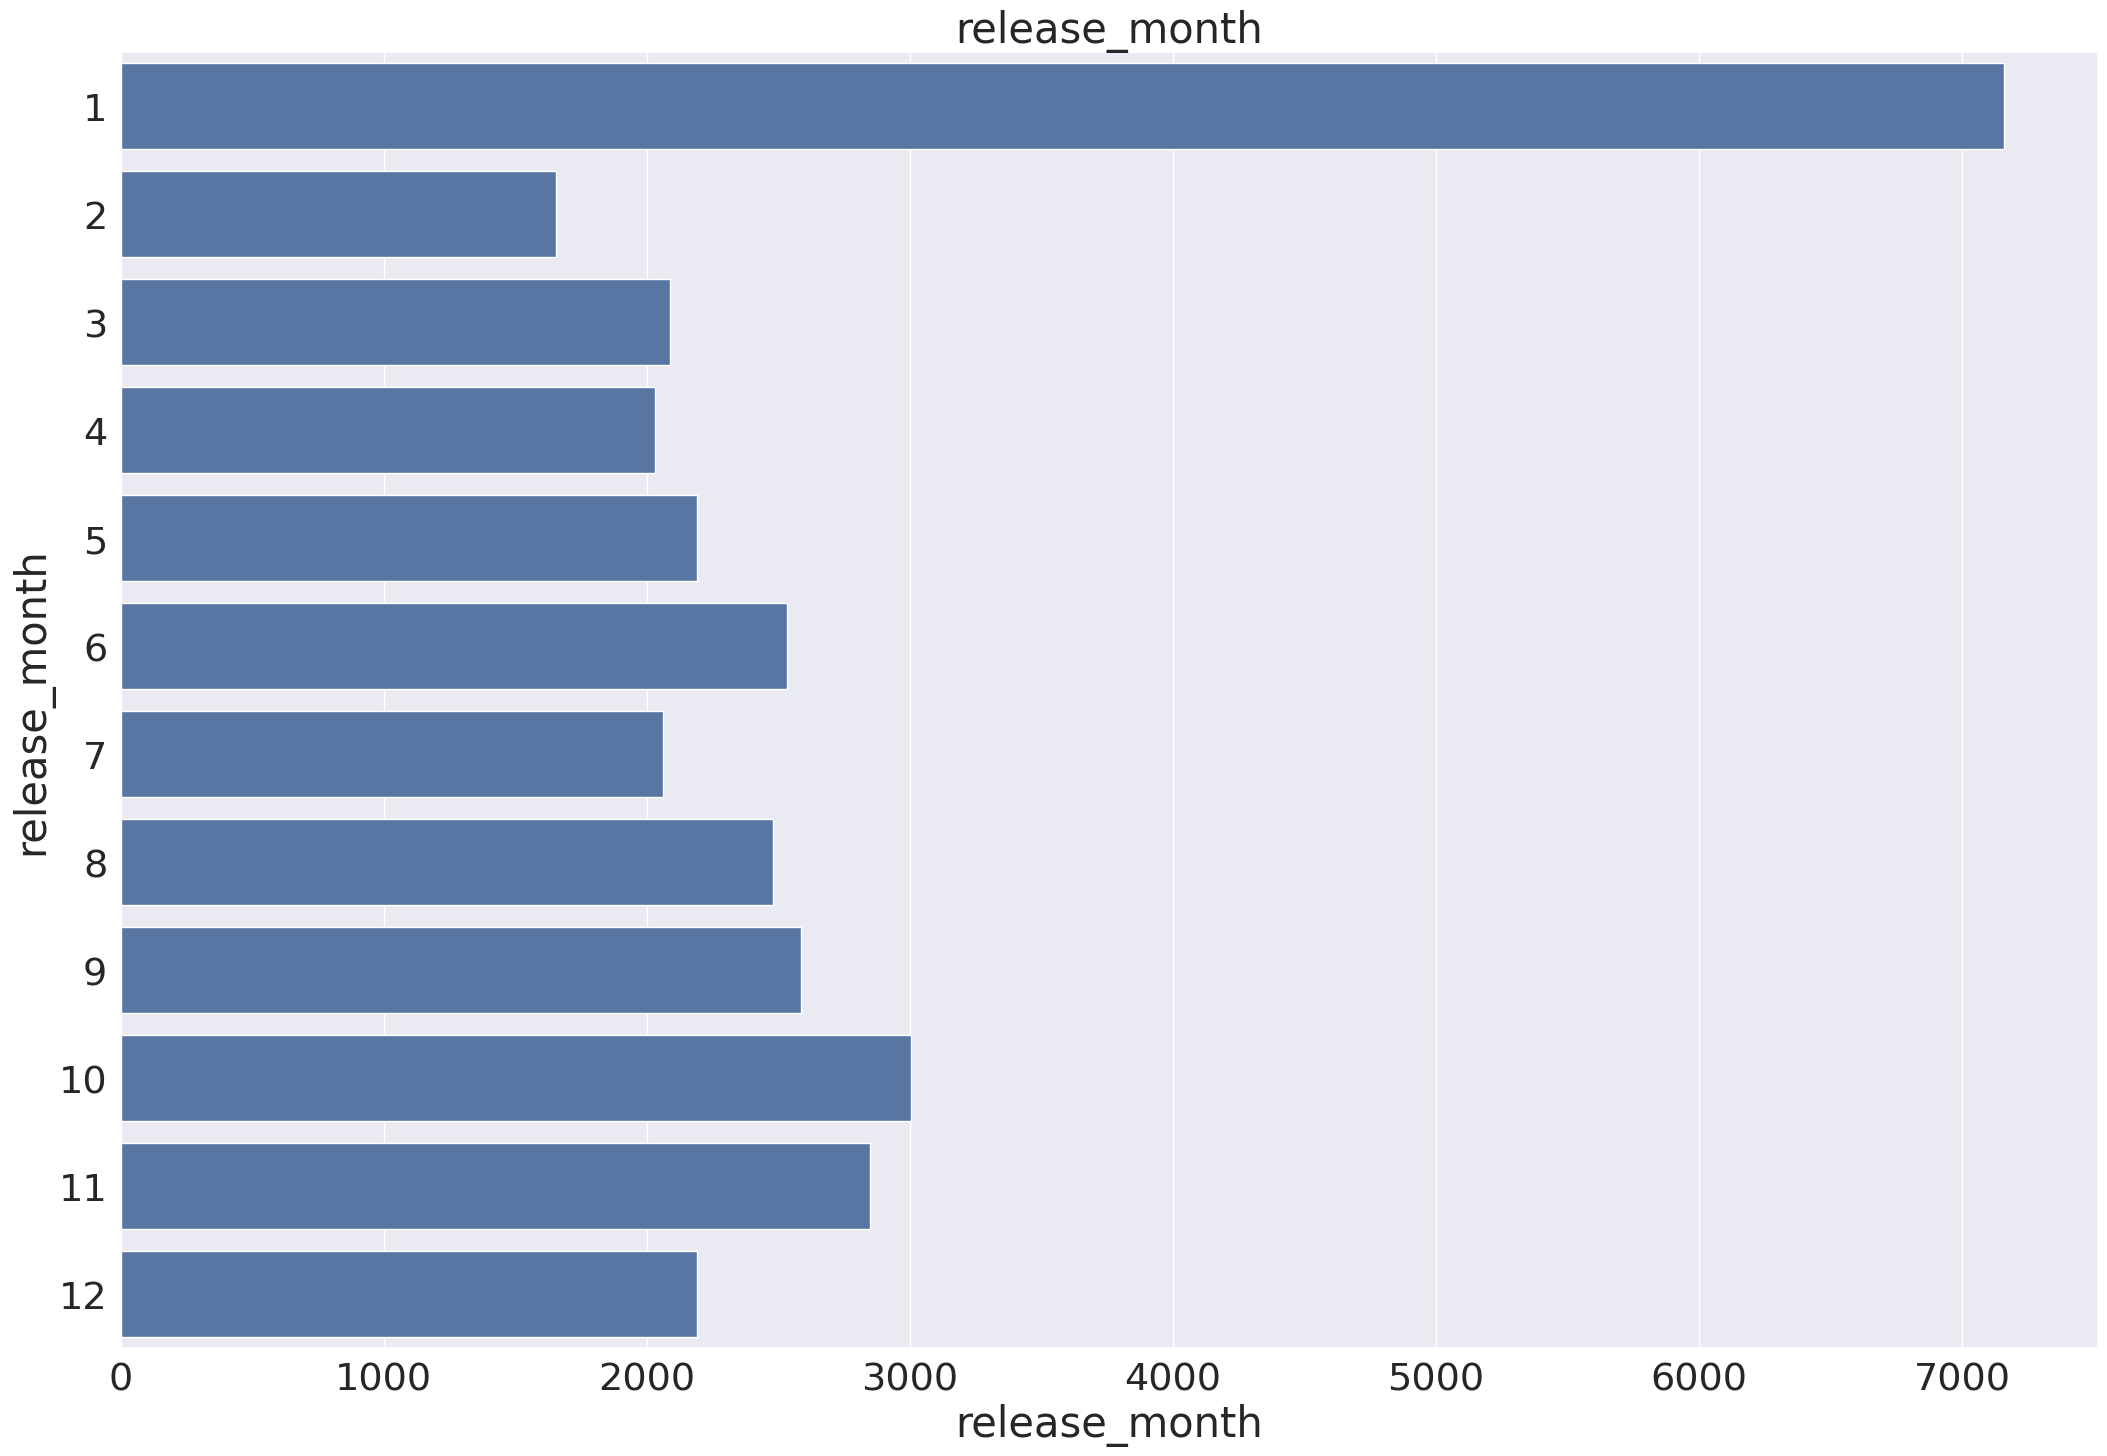

In [13]:
a = 2  # number of rows
b = 2  # number of columns
c = 1  # plot counter

fig = plt.figure(figsize=(50,40))
plt.subplots_adjust(hspace = 0.5)
sns.set(font_scale = 2.5)
for i in categorical_df:

        plt.subplot(a, b, c)
        plt.title('{}'.format(i))
        plt.xlabel(i)
        sns.countplot(categorical_df[i])
        c = c + 1

* Deal with numeric continues data

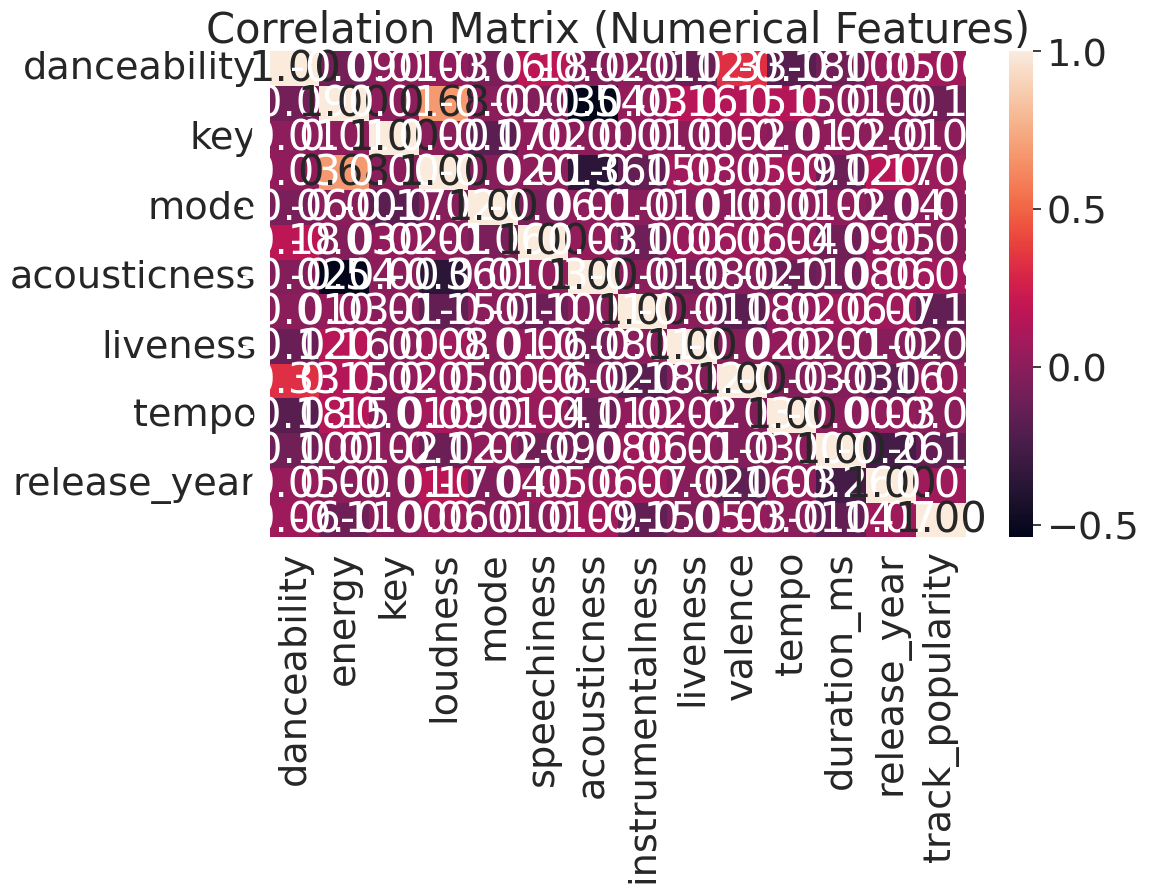

In [14]:
# ==============================================================
# 🔢 NUMERIC FEATURES ANALYSIS
# ==============================================================

num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('track_popularity')

# Correlation matrix
plt.figure(figsize=(10, 6))
corr = df[num_cols.tolist() + ['track_popularity']].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

In [15]:
# create histograms

cols= ['danceability',
       'energy',
       'loudness',
       'speechiness',
       'acousticness',
       'instrumentalness',
       'liveness',
       'valence',
       'tempo',
       'duration_ms',
       'track_popularity'
       ]
con_df = df[cols]

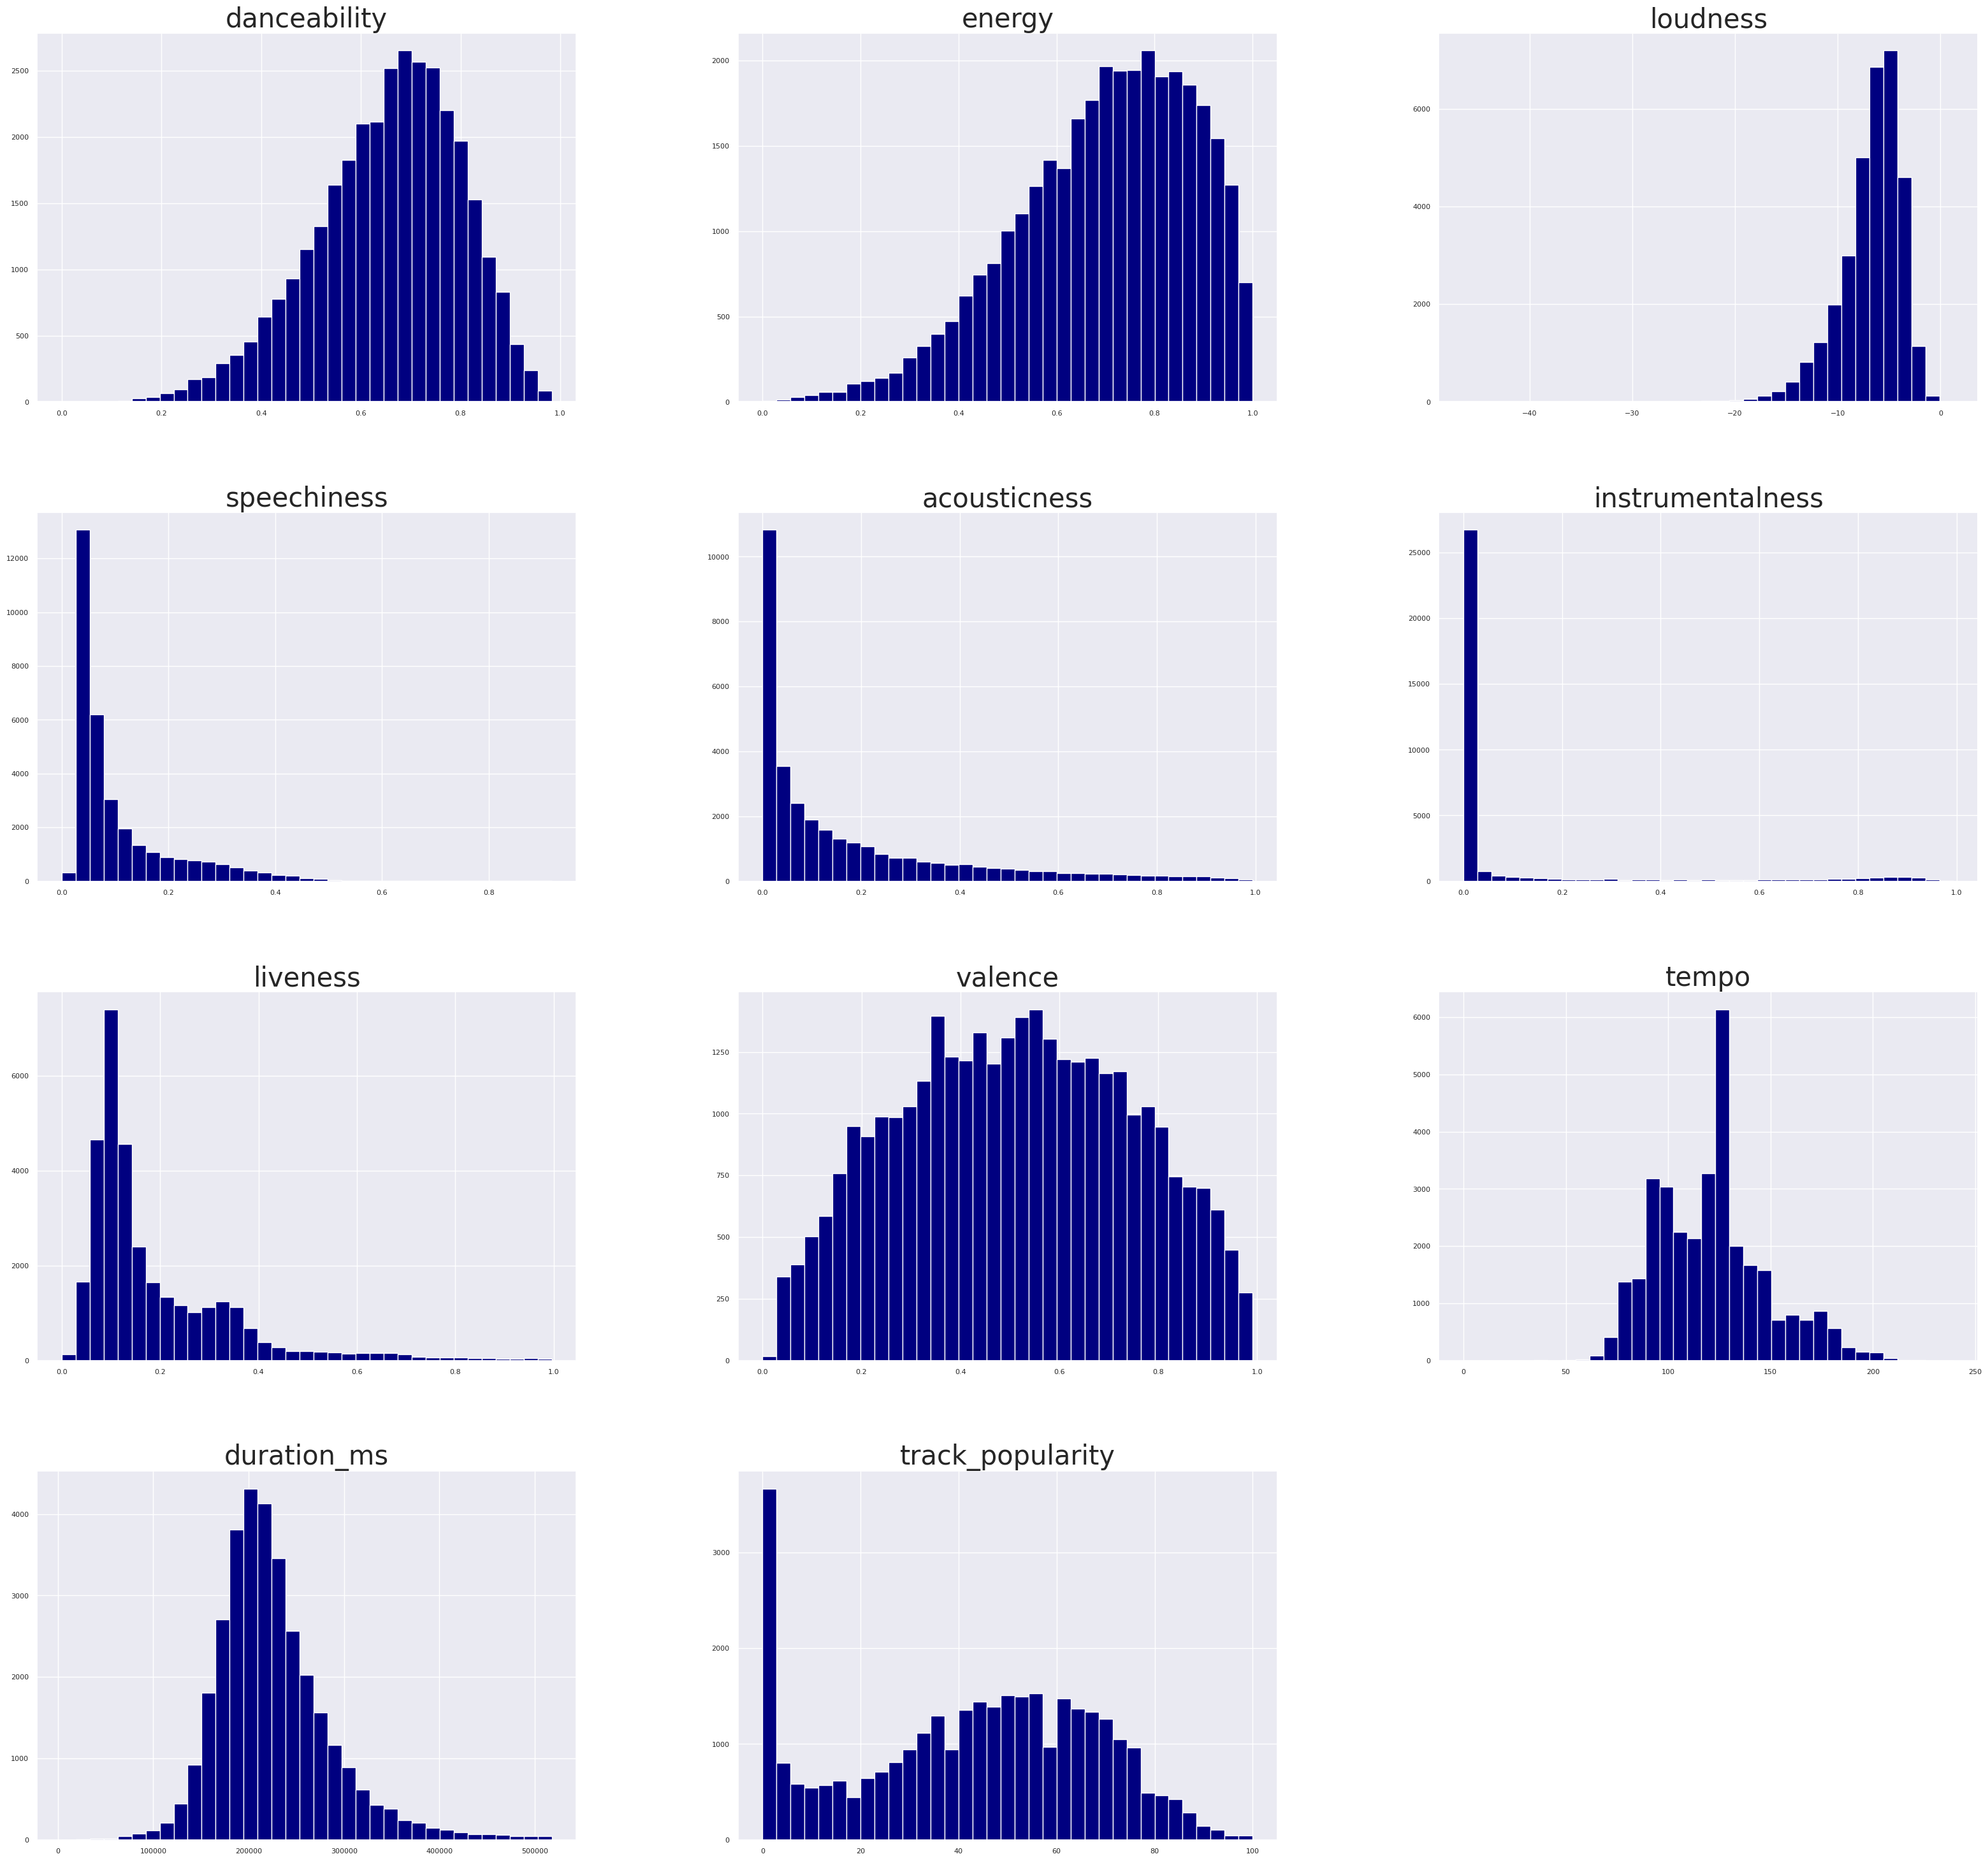

In [16]:
con_df.hist(figsize=(35, 35), bins=35, xlabelsize=8, ylabelsize=8, color = "navy");

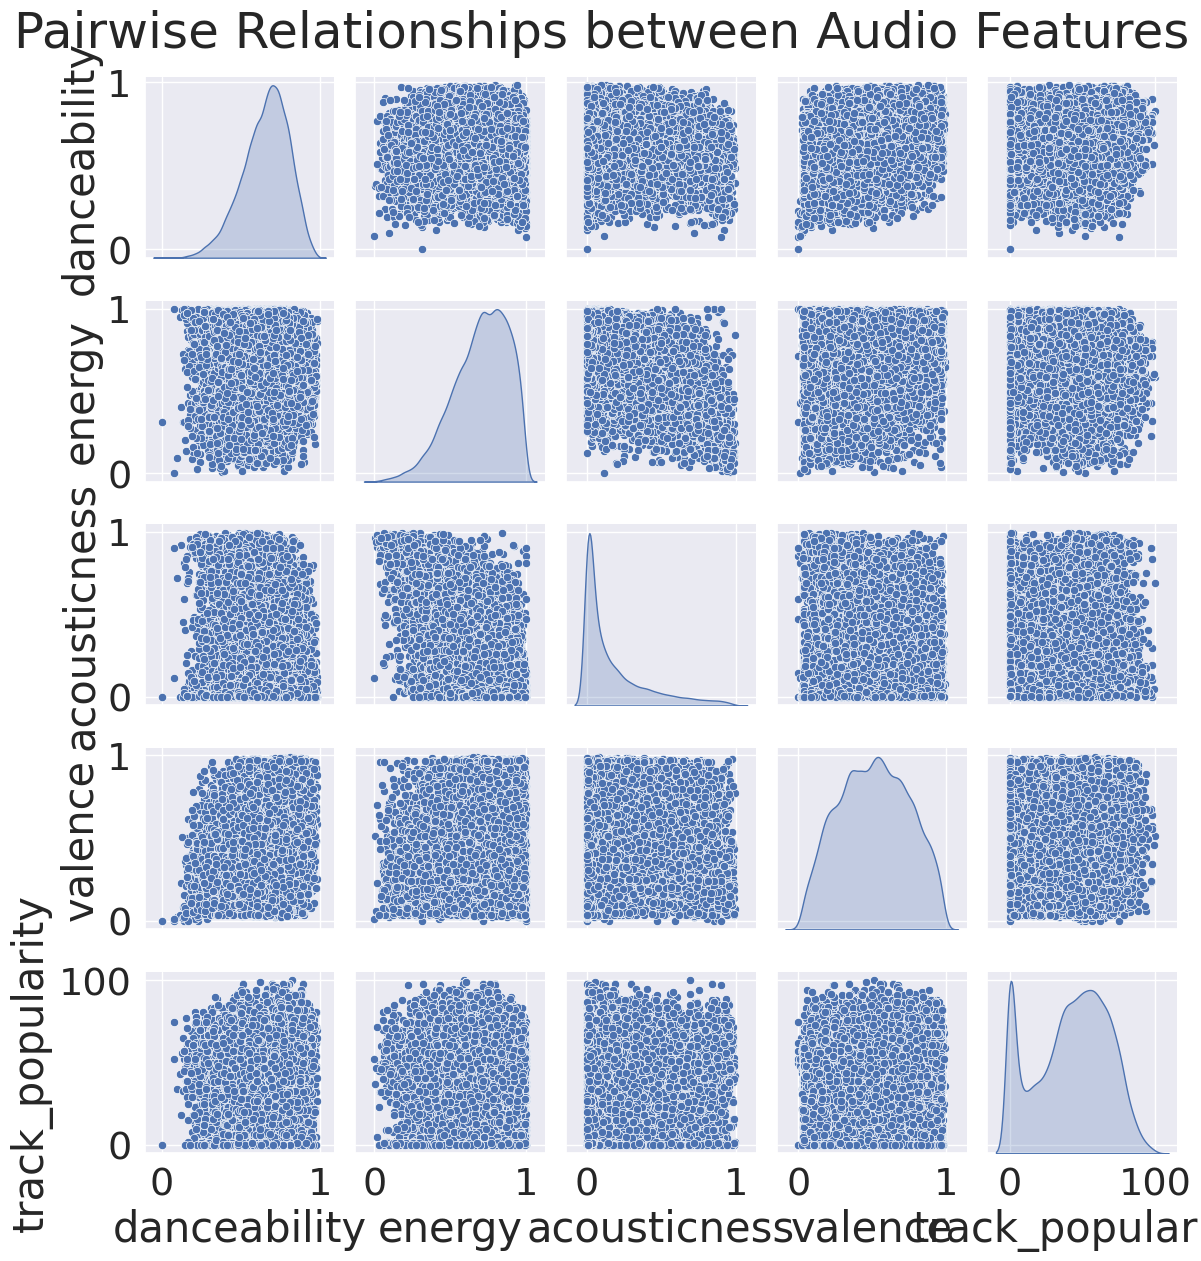

In [17]:
# ==============================================================
# 🤝 RELATIONSHIP ANALYSIS (Optional Deep Dive)
# ==============================================================

# Pairplot for a few numeric features
selected_num = ['danceability', 'energy', 'acousticness', 'valence', 'track_popularity']
sns.pairplot(df[selected_num], diag_kind='kde')
plt.suptitle("Pairwise Relationships between Audio Features", y=1.02)
plt.show()

# Skewness

In [18]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default
pd.DataFrame(con_df.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

,skewness
instrumentalness,2.759472
liveness,2.076720
speechiness,1.967029
acousticness,1.594786
duration_ms,1.149863
tempo,0.528878
valence,-0.005485
track_popularity,-0.233320
danceability,-0.504488
energy,-0.636330


As can be seen here, the following categories are normaly distributed:

* tempo
* valence
* danceability
* energy

(other than our target category "track_popularity" which is also normaly distributed))

In [19]:
con_df.corr()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_popularity
danceability,1.000000,-0.086073,0.025335,0.181721,-0.024519,-0.008655,-0.123859,0.330523,-0.184084,-0.096879,0.064748
energy,-0.086073,1.000000,0.676625,-0.032150,-0.539745,0.033247,0.161223,0.151103,0.149951,0.012611,-0.109112
loudness,0.025335,0.676625,1.000000,0.010339,-0.361638,-0.147824,0.077613,0.053384,0.093767,-0.115058,0.057687
speechiness,0.181721,-0.032150,0.010339,1.000000,0.026092,-0.103424,0.055426,0.064659,0.044603,-0.089431,0.006819
acousticness,-0.024519,-0.539745,-0.361638,0.026092,1.000000,-0.006850,-0.077243,-0.016845,-0.112724,-0.081581,0.085159
instrumentalness,-0.008655,0.033247,-0.147824,-0.103424,-0.006850,1.000000,-0.005507,-0.175402,0.023335,0.063235,-0.149872
liveness,-0.123859,0.161223,0.077613,0.055426,-0.077243,-0.005507,1.000000,-0.020560,0.021018,0.006138,-0.054584
valence,0.330523,0.151103,0.053384,0.064659,-0.016845,-0.175402,-0.020560,1.000000,-0.025732,-0.032225,0.033231
tempo,-0.184084,0.149951,0.093767,0.044603,-0.112724,0.023335,0.021018,-0.025732,1.000000,-0.001412,-0.005378
duration_ms,-0.096879,0.012611,-0.115058,-0.089431,-0.081581,0.063235,0.006138,-0.032225,-0.001412,1.000000,-0.143682


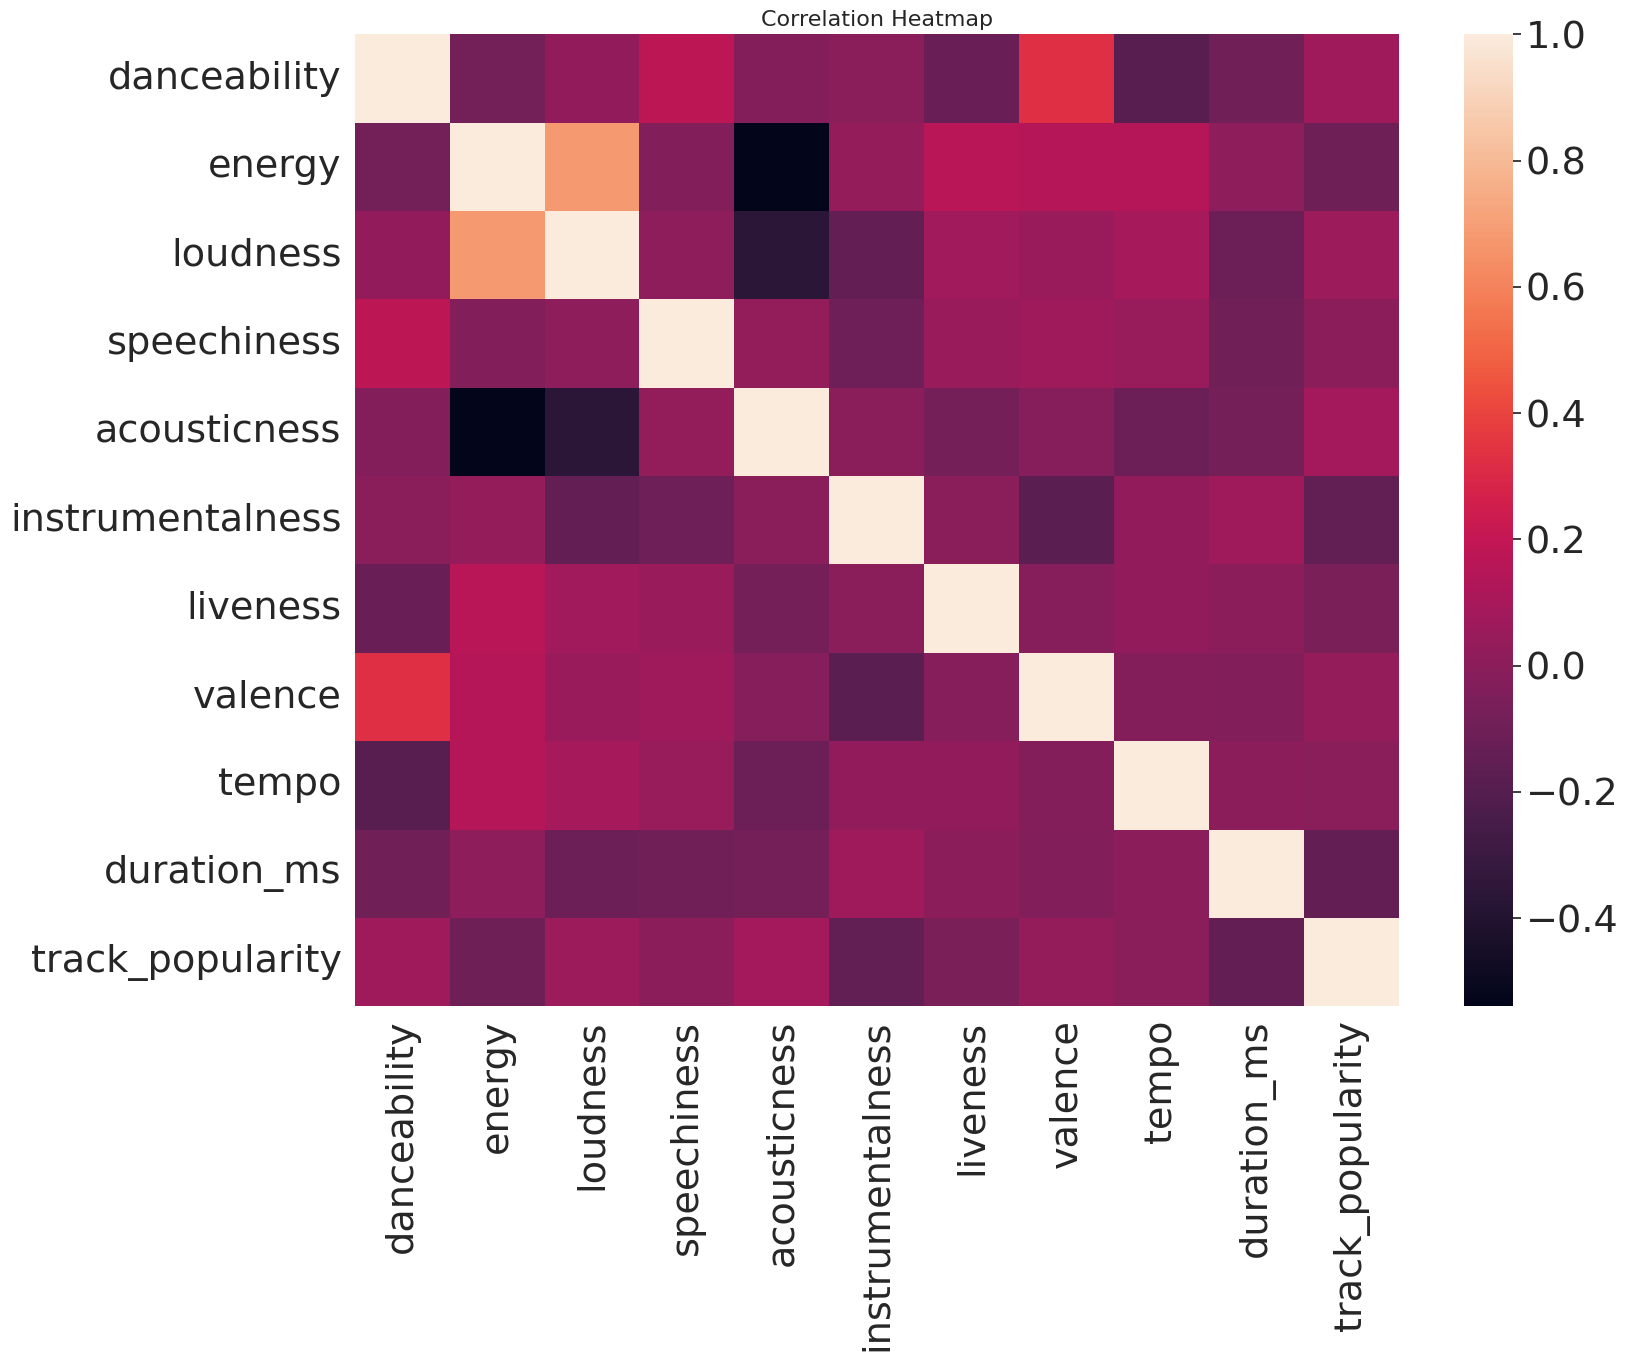

In [20]:
plt.figure(figsize=(15, 12))  # increase width & height
sns.heatmap(con_df.corr(), annot=False)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [21]:
con_df.corr('spearman')

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_popularity
danceability,1.000000,-0.141853,-0.022530,0.260503,0.104375,-0.055700,-0.137864,0.330741,-0.167818,-0.091442,0.065250
energy,-0.141853,1.000000,0.656131,0.065109,-0.491177,0.115165,0.140314,0.122590,0.177076,-0.011436,-0.118494
loudness,-0.022530,0.656131,1.000000,0.099850,-0.283909,-0.162442,0.083143,0.042032,0.112165,-0.133475,0.065369
speechiness,0.260503,0.065109,0.099850,1.000000,0.028619,-0.199441,0.057429,0.077773,0.026296,-0.124518,0.006659
acousticness,0.104375,-0.491177,-0.283909,0.028619,1.000000,-0.213523,-0.057762,0.089142,-0.166675,-0.074565,0.128775
instrumentalness,-0.055700,0.115165,-0.162442,-0.199441,-0.213523,1.000000,-0.029225,-0.159671,0.071091,0.077830,-0.193198
liveness,-0.137864,0.140314,0.083143,0.057429,-0.057762,-0.029225,1.000000,-0.053898,0.032863,-0.040434,-0.029923
valence,0.330741,0.122590,0.042032,0.077773,0.089142,-0.159671,-0.053898,1.000000,-0.062639,-0.004150,0.037220
tempo,-0.167818,0.177076,0.112165,0.026296,-0.166675,0.071091,0.032863,-0.062639,1.000000,-0.016053,-0.022321
duration_ms,-0.091442,-0.011436,-0.133475,-0.124518,-0.074565,0.077830,-0.040434,-0.004150,-0.016053,1.000000,-0.120741


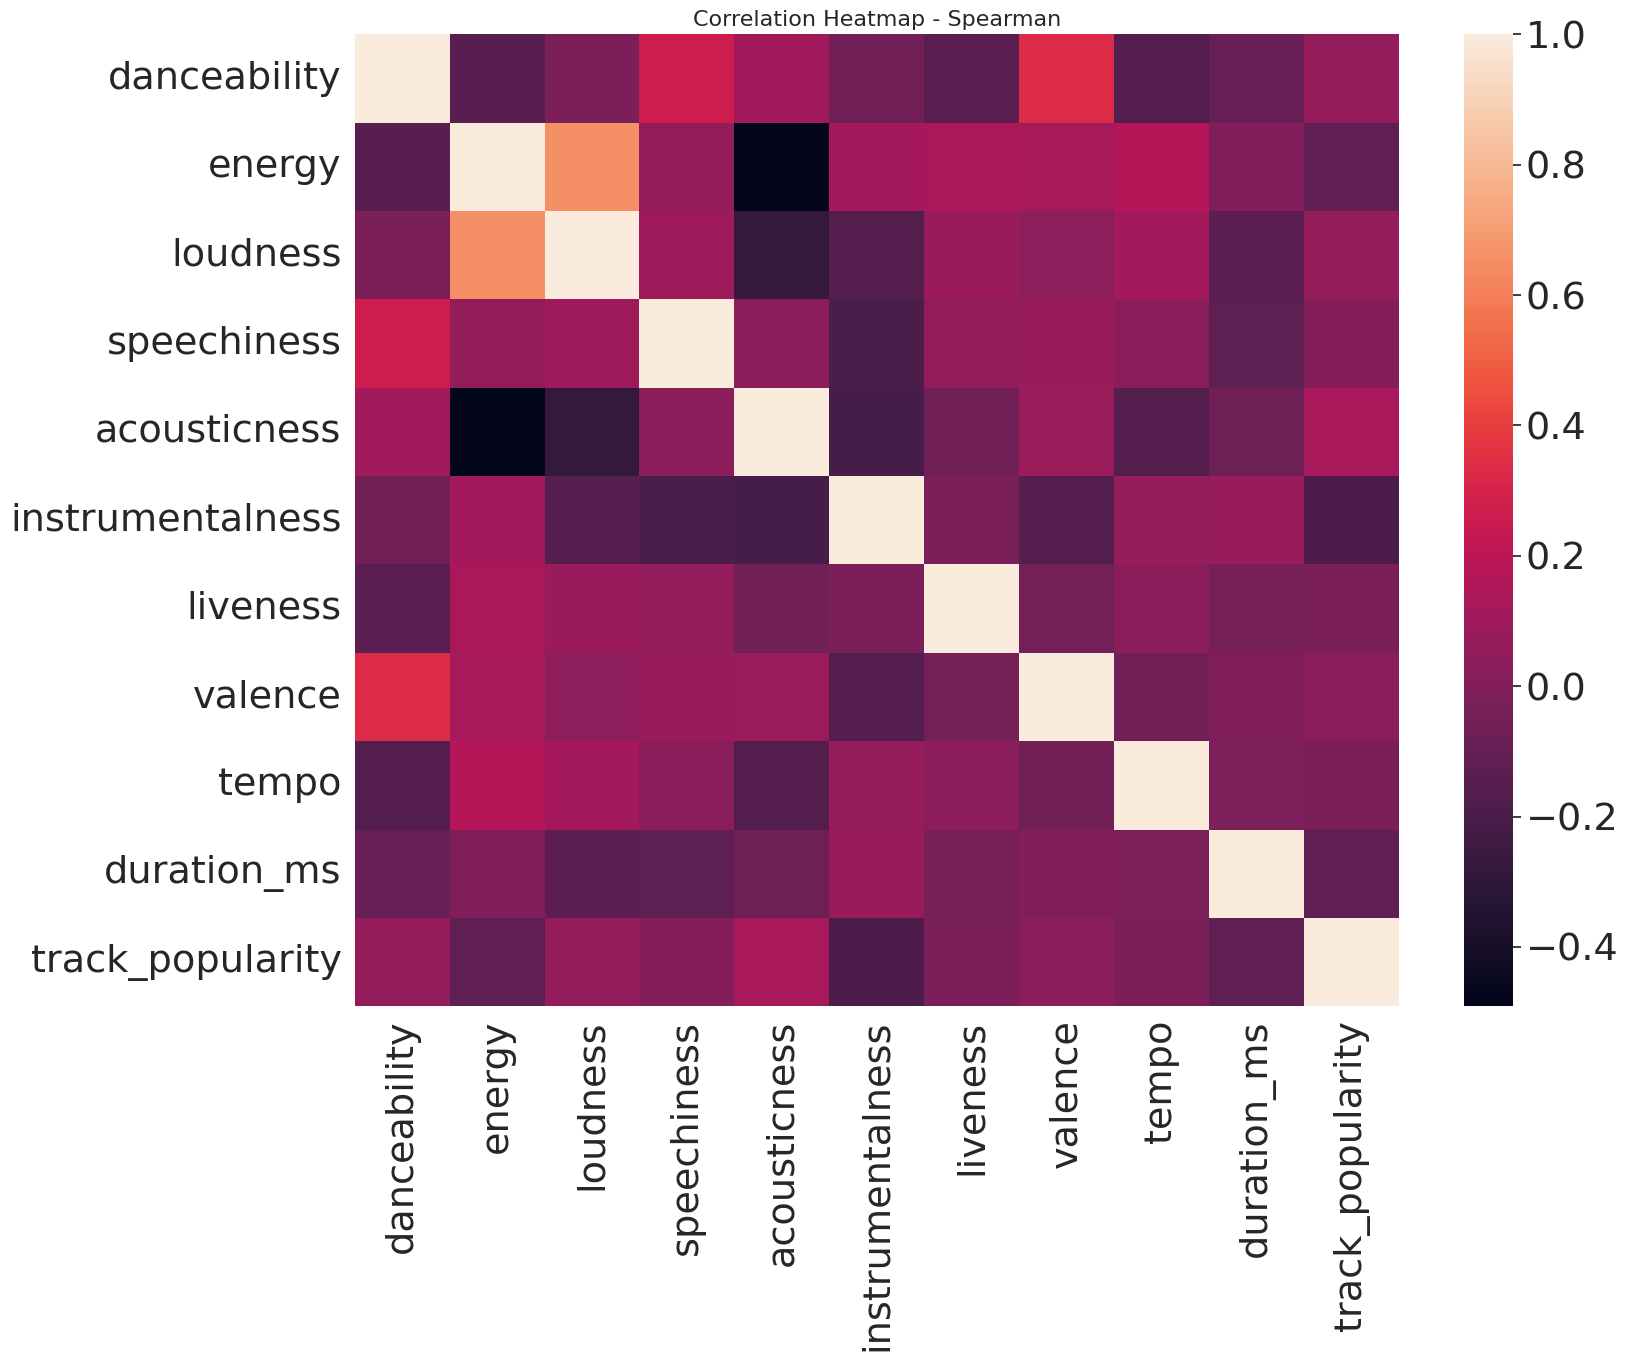

In [22]:
plt.figure(figsize=(15, 12))  # increase width & height
sns.heatmap(con_df.corr('spearman'), annot=False)
plt.title("Correlation Heatmap - Spearman", fontsize=16)
plt.show()

checking to see the correlation bettween dancebility and track_popularity

In [23]:
from scipy.stats import pearsonr, spearmanr

r, p = pearsonr(df['danceability'], df['track_popularity'])
print(f"Pearson r = {r:.3f}, p = {p:.4f}")

Pearson r = 0.065, p = 0.0000


In [24]:
rho, p = spearmanr(df['danceability'], df['track_popularity'])
print(f"Spearman r = {r:.3f}, p = {p:.4f}")

Spearman r = 0.065, p = 0.0000


# T-test

checking a t-test on the 'mode' category - which is binary [1=major, 0=minor]

🎯 T-test for Track Popularity (Major vs Minor)
T-statistic: 1.927
P-value: 0.05400
❌ No significant difference in popularity between major/minor key tracks.


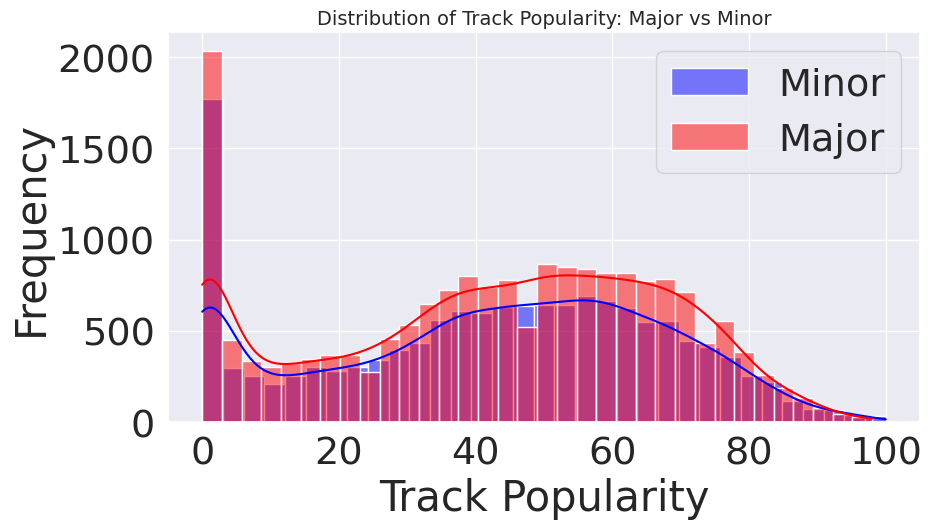

In [25]:
# --- T-test: track_popularity vs explicit ---
#!pip install -q scipy seaborn matplotlib
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the data by explicit / non-explicit songs
major_key = df[df['mode'] == 1]['track_popularity']
minor_key = df[df['mode'] == 0]['track_popularity']

# Perform an independent samples t-test on 'mode'
t_stat, p_value = stats.ttest_ind(major_key, minor_key, equal_var=False)

# Print the results
print("🎯 T-test for Track Popularity (Major vs Minor)")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

# --- Interpretation ---
alpha = 0.05
if p_value < alpha:
    print("✅ Significant difference in popularity between major/minor key tracks.")
else:
    print("❌ No significant difference in popularity between major/minor key tracks.")

# --- Visualization ---
plt.figure(figsize=(10, 6), layout='tight')
sns.histplot(minor_key, kde=True, color='blue', label='Minor', alpha=0.5)
sns.histplot(major_key, kde=True, color='red', label='Major', alpha=0.5)
plt.title('Distribution of Track Popularity: Major vs Minor', fontsize=14)
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# ANOVA

In [26]:
# --- One-Way ANOVA: Track Popularity across Playlist Genres ---

import numpy as np
import pandas as pd
from scipy import stats

# (Optional) set random seed for reproducibility of any random steps
np.random.seed(42)

# 1️⃣ Prepare the groups
# Each genre is one group of popularity values
groups = [group['track_popularity'].dropna().values
          for name, group in df.groupby('playlist_genre')]

# 2️⃣ Run the ANOVA test
f_statistic, p_value = stats.f_oneway(*groups)

# 3️⃣ Print results
print(f"F-statistic: {f_statistic:.3f}")
print(f"P-value: {p_value:.7f}")

# 4️⃣ Interpret
alpha = 0.05
if p_value < alpha:
    print("✅ There is a significant difference between the mean popularity of genres.")
else:
    print("❌ No significant difference between the mean popularity of genres.")

F-statistic: 207.209
P-value: 0.0000000
✅ There is a significant difference between the mean popularity of genres.


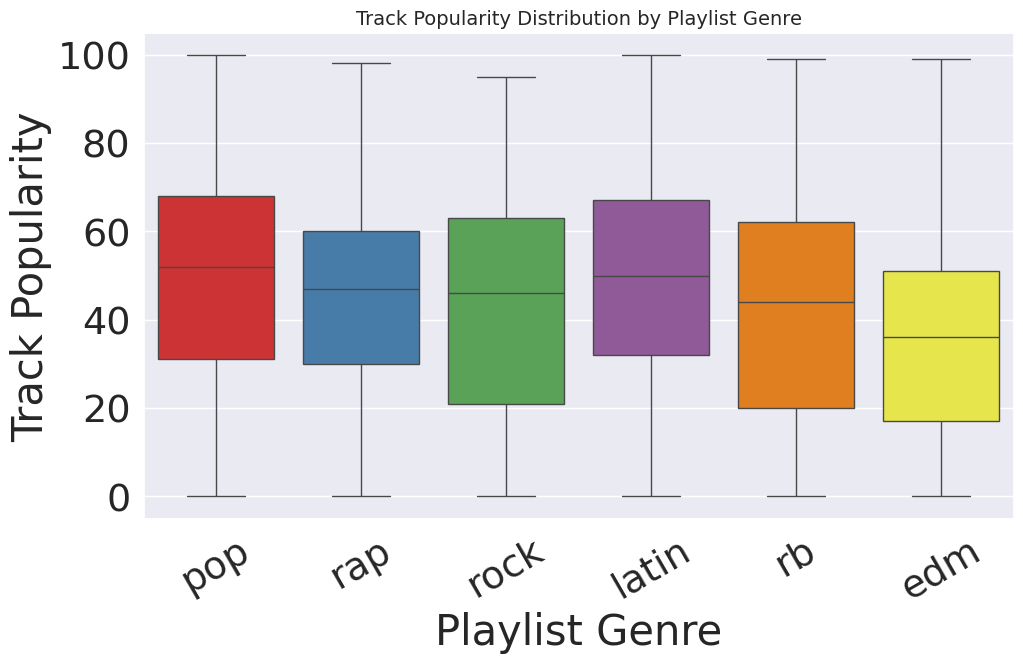

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='playlist_genre', y='track_popularity', palette='Set1')
plt.title("Track Popularity Distribution by Playlist Genre", fontsize=14)
plt.xlabel("Playlist Genre")
plt.ylabel("Track Popularity")
plt.xticks(rotation=30)
plt.show()

# Summery of all of the statistical tests run

In [28]:
# ======================================================================
# Auto-stat tests vs. continuous target (Spotify)
# Numeric -> Pearson & Spearman | Binary -> Welch t-test | Categorical(3+) -> ANOVA
# ======================================================================

import numpy as np
import pandas as pd
from scipy import stats

TARGET = "track_popularity"       # my continuous target
ID_LIKE = {"track_id","track_album_id","playlist_id"}  # ignored columns
MAX_CATS_ANOVA = 30               # cap very high-cardinality categoricals
MIN_GROUP_N = 2                   # require at least 2 obs per group for t/ANOVA

df_work = df.copy()

# 0) Basic hygiene on target
df_work[TARGET] = pd.to_numeric(df_work[TARGET], errors="coerce")

# Helper: detect column types
def is_binary(col):
    s = df_work[col].dropna().unique()
    return len(s) == 2

def is_numeric(col):
    return pd.api.types.is_numeric_dtype(df_work[col])

def is_categorical(col):
    return (df_work[col].dtype == "object") or pd.api.types.is_categorical_dtype(df_work[col])

def cohen_d(x, y):
    # Cohen's d for independent groups with unequal n
    x, y = pd.Series(x).dropna(), pd.Series(y).dropna()
    nx, ny = len(x), len(y)
    if nx < 2 or ny < 2: return np.nan
    sx2, sy2 = x.var(ddof=1), y.var(ddof=1)
    sp = np.sqrt(((nx-1)*sx2 + (ny-1)*sy2) / (nx+ny-2))
    if sp == 0: return 0.0
    return (x.mean() - y.mean()) / sp

def eta_squared_anova(groups):
    # simple eta^2 = SSB/SST
    vals = np.concatenate(groups)
    grand_mean = np.mean(vals)
    ssb = sum(len(g)*(np.mean(g)-grand_mean)**2 for g in groups)
    sst = np.sum((vals - grand_mean)**2)
    return np.nan if sst == 0 else ssb/sst

results = []

# 1) Iterate over features
for col in df_work.columns:
    if col == TARGET or col in ID_LIKE:
        continue
    if df_work[col].nunique(dropna=False) <= 1:
        continue  # constant

    try:
        # NUMERIC (non-binary)
        if is_numeric(col) and not is_binary(col):
            x = pd.to_numeric(df_work[col], errors="coerce")
            y = df_work[TARGET]
            mask = x.notna() & y.notna()
            x, y = x[mask], y[mask]
            if len(x) >= 3:
                r_p, p_p = stats.pearsonr(x, y)
                r_s, p_s = stats.spearmanr(x, y)
                results.append({
                    "Feature": col,
                    "Test": "Correlation",
                    "Subtest": "Pearson",
                    "Statistic": r_p,
                    "P_value": p_p,
                    "Effect_Size": abs(r_p),
                    "Notes": f"n={len(x)}"
                })
                results.append({
                    "Feature": col,
                    "Test": "Correlation",
                    "Subtest": "Spearman",
                    "Statistic": r_s,
                    "P_value": p_s,
                    "Effect_Size": abs(r_s),
                    "Notes": f"n={len(x)}"
                })

        # BINARY → Welch t-test
        elif is_binary(col):
            vals = df_work[col].dropna().unique()
            a_val, b_val = vals[0], vals[1]
            g1 = df_work.loc[df_work[col] == a_val, TARGET].dropna()
            g2 = df_work.loc[df_work[col] == b_val, TARGET].dropna()
            if len(g1) >= MIN_GROUP_N and len(g2) >= MIN_GROUP_N:
                t_stat, p_val = stats.ttest_ind(g1, g2, equal_var=False, nan_policy="omit")
                d = cohen_d(g1, g2)
                results.append({
                    "Feature": col,
                    "Test": "Welch t-test",
                    "Subtest": f"{a_val} vs {b_val}",
                    "Statistic": t_stat,
                    "P_value": p_val,
                    "Effect_Size": d,
                    "Notes": f"n1={len(g1)}, n2={len(g2)}, mean_diff={g1.mean()-g2.mean():.2f}"
                })

        # CATEGORICAL (>=3 groups) → ANOVA
        elif is_categorical(col):
            # Trim extreme cardinality to top categories by count (others → 'other')
            s = df_work[col].astype(str)
            vc = s.value_counts()
            if len(vc) > MAX_CATS_ANOVA:
                keep = vc.index[:MAX_CATS_ANOVA]
                s = s.where(s.isin(keep), "other")
            df_tmp = df_work[[TARGET]].assign(_cat=s)
            # form groups
            groups = [g[TARGET].dropna().values for _, g in df_tmp.groupby("_cat") if len(g) >= MIN_GROUP_N]
            if len(groups) >= 2:
                f_stat, p_val = stats.f_oneway(*groups)
                eta2 = eta_squared_anova(groups)
                results.append({
                    "Feature": col,
                    "Test": "One-way ANOVA",
                    "Subtest": f"k={len(groups)} groups",
                    "Statistic": f_stat,
                    "P_value": p_val,
                    "Effect_Size": eta2,
                    "Notes": f"levels={min(len(vc), MAX_CATS_ANOVA)} (capped at {MAX_CATS_ANOVA})"
                })

        # else: skip unknown types

    except Exception as e:
        results.append({
            "Feature": col,
            "Test": "ERROR",
            "Subtest": "",
            "Statistic": np.nan,
            "P_value": np.nan,
            "Effect_Size": np.nan,
            "Notes": f"{type(e).__name__}: {e}"
        })

# 2) Assemble & present
out = pd.DataFrame(results)
if not out.empty:
    # Multiple-testing helper (Benjamini-Hochberg FDR)
    try:
        from statsmodels.stats.multitest import multipletests
        mask = out["P_value"].notna()
        pvals = out.loc[mask, "P_value"].values
        _, qvals, _, _ = multipletests(pvals, method="fdr_bh")
        out.loc[mask, "Q_value(FDR)"] = qvals
    except Exception:
        out["Q_value(FDR)"] = np.nan

    # Sort by p-value
    out = out.sort_values(["P_value","Feature","Test"], na_position="last").reset_index(drop=True)

    # Pretty formatting for display
    display(out.style.format({
        "Statistic": "{:.3f}",
        "P_value": "{:.5f}",
        "Q_value(FDR)": "{:.5f}",
        "Effect_Size": "{:.3f}"
    }).bar(subset=["Effect_Size"], color="#a1d99b"))

    out.to_csv("stats_summary_vs_track_popularity.csv", index=False)
    print("✅ Saved: stats_summary_vs_track_popularity.csv")
else:
    print("No eligible features to test.")


,Feature,Test,Subtest,Statistic,P_value,Effect_Size,Notes,Q_value(FDR)
0,playlist_name,One-way ANOVA,k=31 groups,80.913,0.00000,0.069,levels=30 (capped at 30),0.00000
1,playlist_subgenre,One-way ANOVA,k=24 groups,195.851,0.00000,0.121,levels=24 (capped at 30),0.00000
2,popularity_class,One-way ANOVA,k=5 groups,141817.868,0.00000,0.945,levels=5 (capped at 30),0.00000
3,instrumentalness,Correlation,Spearman,-0.193,0.00000,0.193,n=32833,0.00000
4,release_year,Correlation,Spearman,0.178,0.00000,0.178,n=32833,0.00000
5,playlist_genre,One-way ANOVA,k=6 groups,207.209,0.00000,0.031,levels=6 (capped at 30),0.00000
6,track_album_release_date,One-way ANOVA,k=31 groups,31.360,0.00000,0.028,levels=30 (capped at 30),0.00000
7,instrumentalness,Correlation,Pearson,-0.150,0.00000,0.150,n=32833,0.00000
8,duration_ms,Correlation,Pearson,-0.144,0.00000,0.144,n=32833,0.00000
9,track_artist,One-way ANOVA,k=31 groups,24.842,0.00000,0.022,levels=30 (capped at 30),0.00000


✅ Saved: stats_summary_vs_track_popularity.csv


looking at the table, the statistical test don't include the chi-squared test.
this is because my target variable 'track_popularity is continous.

# now lets look at a summary for some visualizations

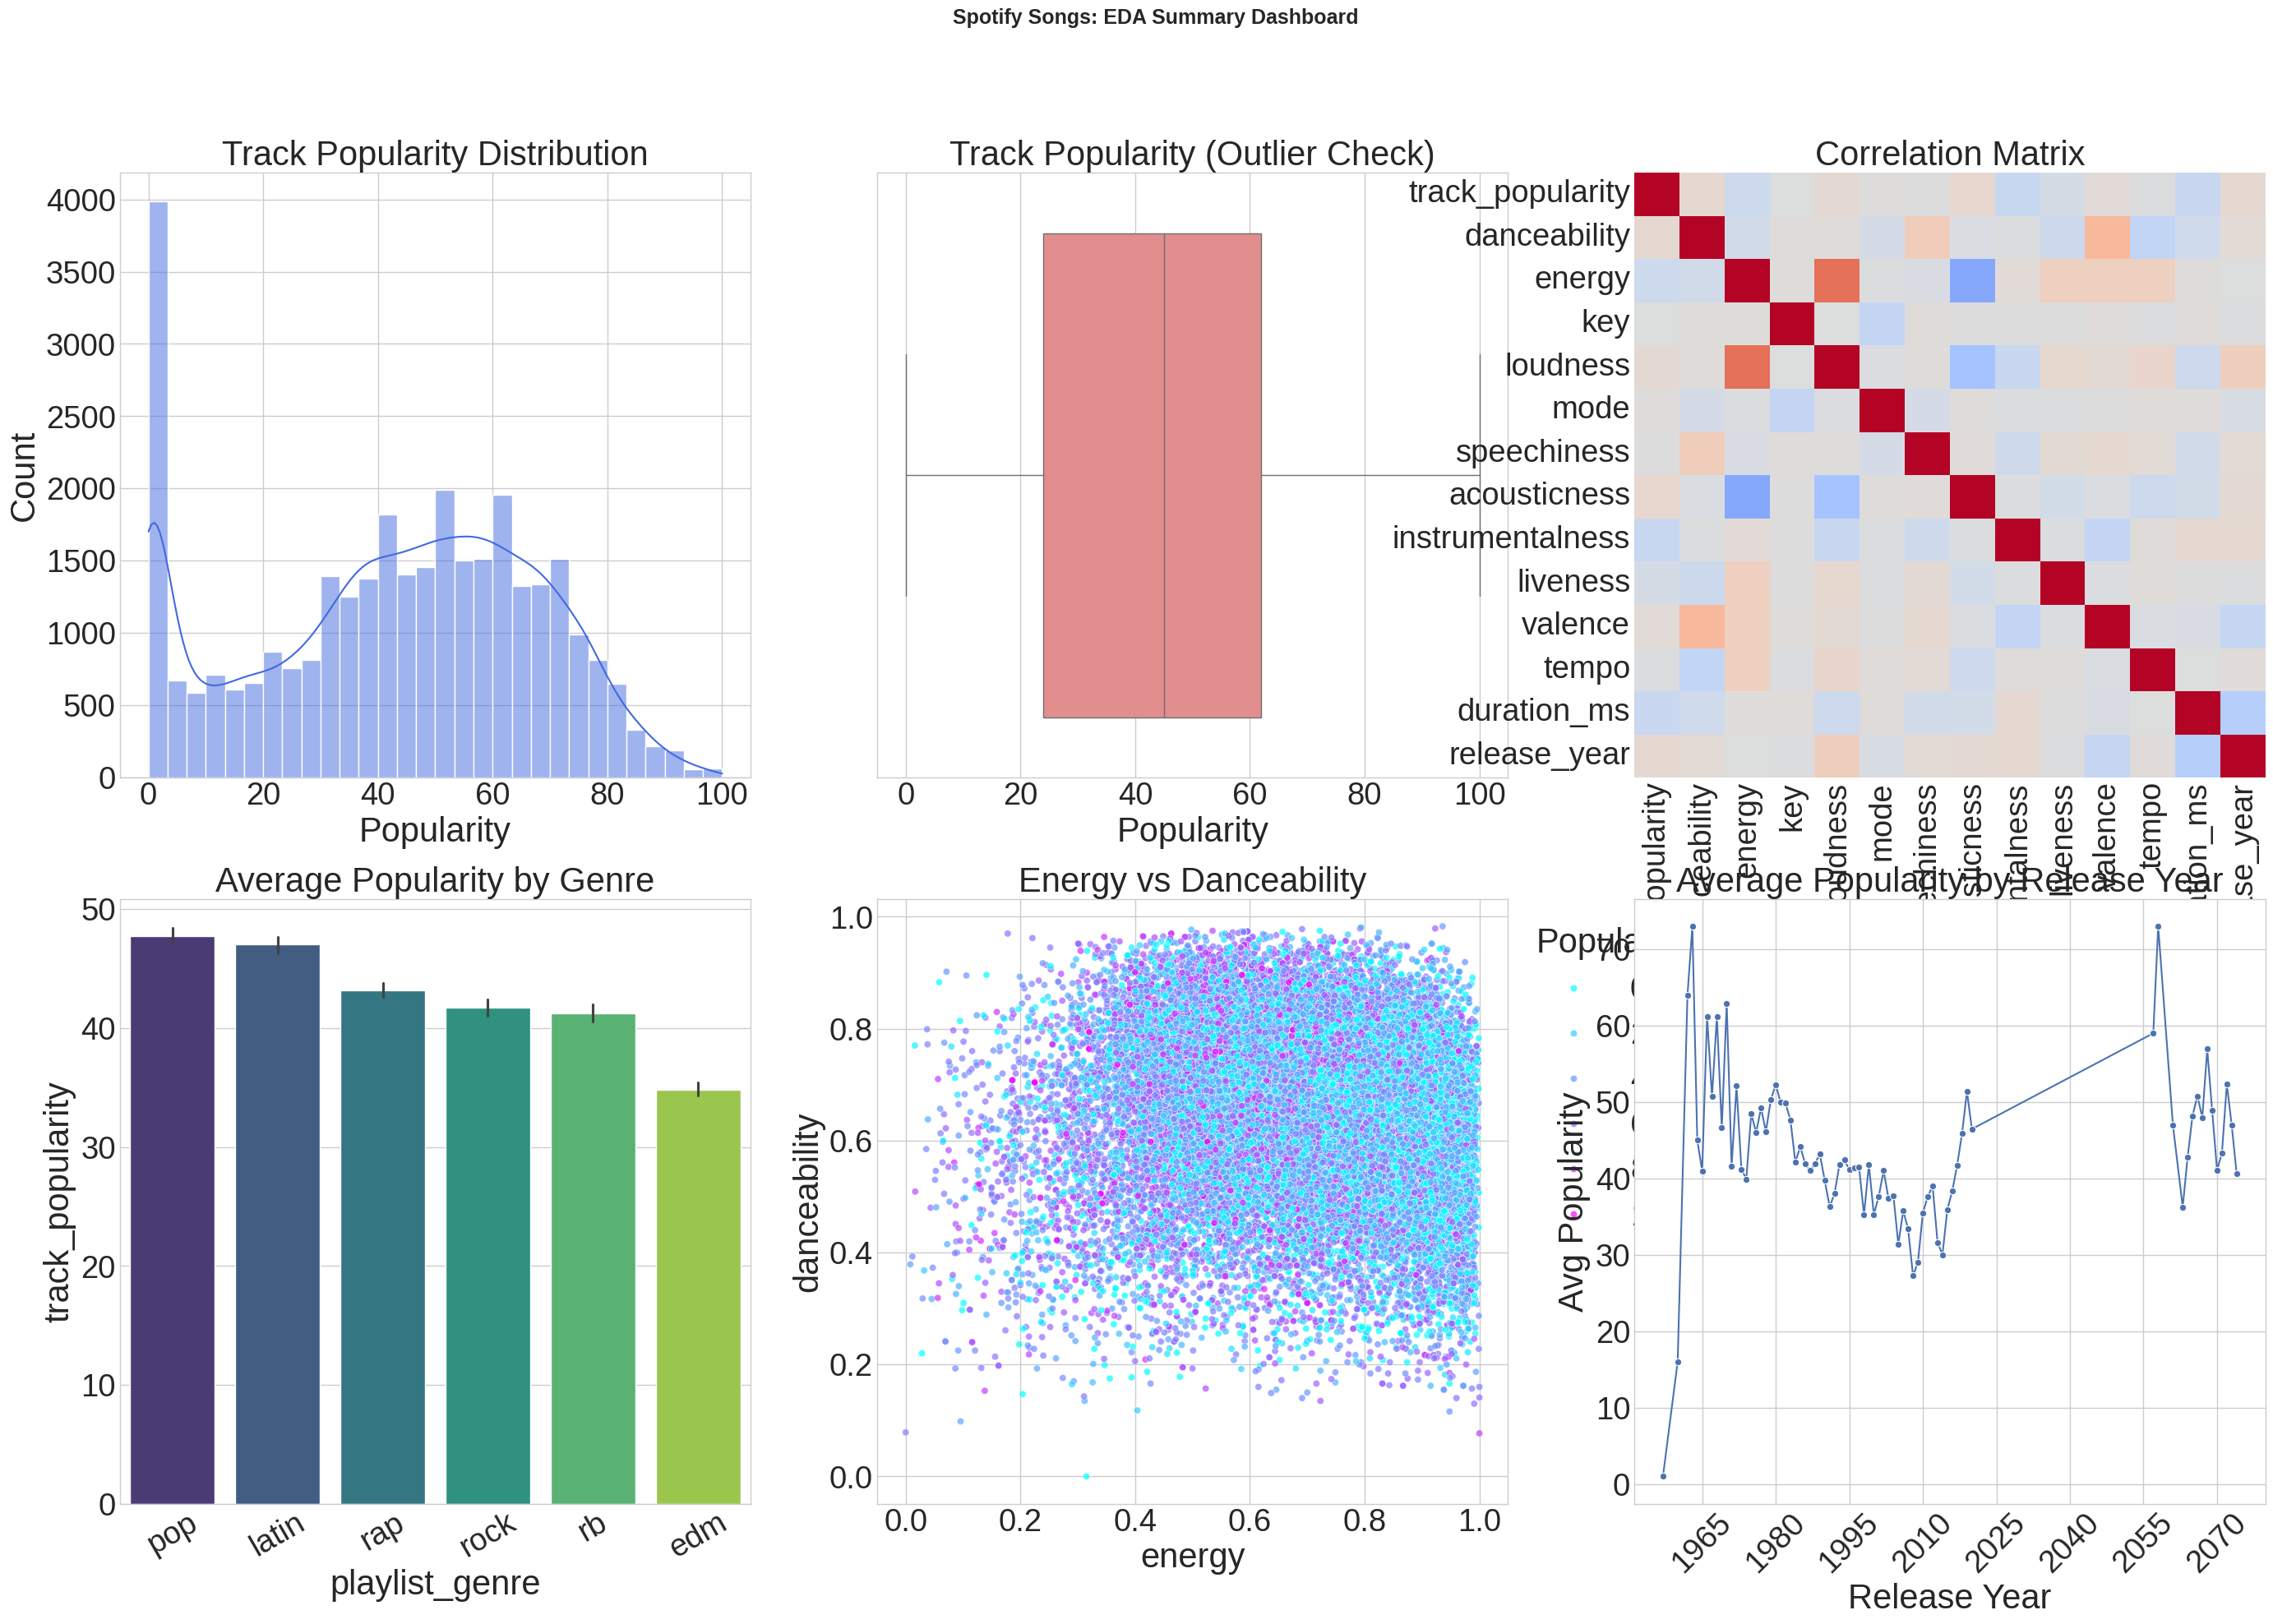

In [29]:
# ==============================================================
# 📊 VISUALIZATION SUMMARY DASHBOARD
# ==============================================================

from matplotlib.ticker import MaxNLocator

plt.style.use("seaborn-v0_8-whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(30, 20))
fig.suptitle("Spotify Songs: EDA Summary Dashboard", fontsize=18, fontweight='bold')

# --- 1️⃣ Track Popularity Distribution ---
sns.histplot(df['track_popularity'], bins=30, kde=True, color='royalblue', ax=axes[0, 0])
axes[0, 0].set_title("Track Popularity Distribution")
axes[0, 0].set_xlabel("Popularity")
axes[0, 0].set_ylabel("Count")

# --- 2️⃣ Boxplot for Target (Outliers) ---
sns.boxplot(x=df['track_popularity'], color='lightcoral', ax=axes[0, 1])
axes[0, 1].set_title("Track Popularity (Outlier Check)")
axes[0, 1].set_xlabel("Popularity")

# --- 3️⃣ Correlation Heatmap ---
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0, cbar=False, ax=axes[0, 2])
axes[0, 2].set_title("Correlation Matrix")

# --- 4️⃣ Top Genres by Avg Popularity ---
if 'playlist_genre' in df.columns:
    order = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False).index
    sns.barplot(x='playlist_genre', y='track_popularity', data=df, order=order,
                palette='viridis', ax=axes[1, 0])
    axes[1, 0].set_title("Average Popularity by Genre")
    axes[1, 0].tick_params(axis='x', rotation=30)

# --- 5️⃣ Energy vs Danceability ---
cols = ['energy', 'danceability']
if all(col in df.columns for col in cols):
    sns.scatterplot(data=df, x='energy', y='danceability',
                    hue='track_popularity', palette='cool', alpha=0.7, ax=axes[1, 1])
    axes[1, 1].set_title("Energy vs Danceability")
    axes[1, 1].legend(title="Popularity", bbox_to_anchor=(1, 1))

# --- 6️⃣ Release Year Trends ---
if 'release_year' in df.columns:
    # ensure numeric & sorted
    df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
    yearly_avg = (df.dropna(subset=['release_year'])
                    .groupby('release_year')['track_popularity']
                    .mean()
                    .reset_index()
                    .sort_values('release_year'))

    ax = axes[1, 2]
    sns.lineplot(data=yearly_avg, x='release_year', y='track_popularity',
                 marker='o', ax=ax)
    ax.set_title("Average Popularity by Release Year")
    ax.set_xlabel("Release Year")
    ax.set_ylabel("Avg Popularity")

    # show ~8–10 evenly spaced integer ticks
    ax.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=True))
    # optional: show only every Nth tick explicitly
    # ticks = yearly_avg['release_year'][::5]
    # ax.set_xticks(ticks)

    for label in ax.get_xticklabels():
        label.set_rotation(45)

# ✅Finished EDA, on to Data Cleansing